In [1]:
!pip install mediapipe
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

help(mp_pose.Pose)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  Pose(static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Please refer to https://solutions.mediapipe.dev/pose#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Pose
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, model_complexity=1, smooth_landmarks=True, enable_segmentation=False, smooth_segmentation=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe Pose object.
 |      
 |      Args:
 |        static_i

In [2]:
import cv2
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    cv2.imwrite('grayscale.jpg',img)
    return img

res:: ['039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg']
df_col: Index(['image_name', 'leftHeel', 'leftFoot', 'rightHeel', 'rightFoot',
       'dis_rightHeelFootList', 'dis_leftHeelFootList', 'leftkneeAngle',
       'rightKneeAngle', 'leftSHKAngle', 'rightSHKAngle', 'stance',
       'left_footZ', 'right_footZ', 'leftfootangle', 'rightfootangle',
       'medialkneeposition', 'leftHipAngle', 'rightHipAngle', 'leftAnkleX',
       'leftAnkleY', 'leftkneeX', 'leftkneeY'],
      dtype='object')
<class 'int'>
<class 'str'>
count 108


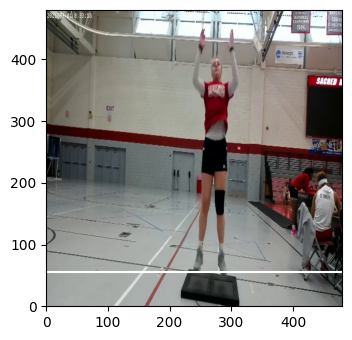

In [3]:
from matplotlib import pyplot as plt
import pandas as pd

df2 = pd.read_csv('LateralLessScore.csv')
# Using orient as records
df2 = df2.to_dict('records')

#frames on jump
res = [d['image_name'] for d in df2 if((d['rightHeel'] > 350) and d['rightHeel'] < 410)]
print("================================================")
print("res::",(res))

ans = len(res)
a = ans - 1  #to fetch last frame

ff = (res[0])

lf = (res[a])

# lastframe = res.pop()
# print("lastframe:",(lastframe))


# framefetched = input(str("Enter frame name:"))


# Driver code   
df1 = pd.read_csv('LateralLessScore.csv')
print("df_col:",df1.columns)
name_list = df1['image_name'].tolist()
rightheel_list = (df1['rightHeel'].tolist())
A = [int(rightheel_list) for rightheel_list in rightheel_list]
print(type(A[0]))
B = [(name_list) for name_list in name_list]
print(type(B[0]))

framelist = []
imagelist = []
res = None
c = 0
for frame,img in zip(A,B):
    if frame >= 55:
        c = c + 1
        framelist.append(frame)
        imagelist.append(img)
print("count", c)

framelist.clear()
imagelist.clear()

# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
# im = plt.imread("frontalimages/"+ff)
# fig, ax = plt.subplots()
# im = ax.imshow(im, extent=[0, 480,0 , 480])
# plt.axhline(y = 55, color = 'white', linestyle = '-')
# plt.show()

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("frontalimages/"+lf)
fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 480,0 , 480])
plt.axhline(y = 55, color = 'white', linestyle = '-')
plt.show()



# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
# im = plt.imread("frontalimages/"+lf)
# fig, ax = plt.subplots()
# pts = np.array([[240,60],[309,51]])
# im = ax.imshow(im, extent=[0, 480,0 , 480])
# plt.scatter(pts[:, 0], pts[:, 1], color="green")
# # plt.axhline(y = 430, color = 'white', linestyle = '-')
# plt.show()


In [4]:
import cv2
import pandas as pd
output_loc = "frontalimages/"
cap = cv2.VideoCapture('videoFrontal.mp4')
count = 0
frame_no = 0
framelist = []
timestamplist = []
while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
#         print("for frame : " + str(frame_no) + "   timestamp is: ", str(cap.get(cv2.CAP_PROP_POS_MSEC)))
        cv2.imwrite(output_loc + "/%#03d.jpg" % (count+1), curr_frame)
        count = count + 1
        framelist.append(str(frame_no)+".jpg")
        timestamplist.append(str(cap.get(cv2.CAP_PROP_POS_MSEC)))
    else:
        break
    frame_no += 1
cap.release()

print("=============================================================")
df_timestamp = pd.DataFrame({'Imagename':framelist,'TimeStamp':timestamplist})
# df_timestamp.iloc[39]
if(df_timestamp['Imagename'][52]):
    ans = float(df_timestamp['TimeStamp'].iloc[52])
    print(ans)
if(df_timestamp['Imagename'][53]):
    ans1 = float(df_timestamp['TimeStamp'].iloc[53])
    print(ans1)
timetaken_frontal = (ans1-ans) * 0.01
print("Timetaken in miliseconds:",timetaken_frontal)

1733.3333333333335
1766.6666666666665
Timetaken in miliseconds: 0.3333333333333303


In [9]:
import pandas as pd
df1 = pd.read_csv('LateralLessScore.csv')
# print(df1.columns)

df = pd.DataFrame(
   dict(
      image_name = df1['image_name'],
      leftHeel = df1['leftHeel'],
      leftFoot = df1['leftFoot'],
      rightHeel = df1['rightHeel'],
      rightFoot = df1['rightFoot'],
      dis_rightHeelFootList = df1['dis_rightHeelFootList'],
      dis_leftHeelFootList = df1['dis_leftHeelFootList'],
      leftkneeAngle = df1['leftkneeAngle'],
      rightKneeAngle = df1['rightKneeAngle'],
      leftSHKAngle = df1['leftSHKAngle'],
      rightSHKAngle = df1['rightSHKAngle'],
      stance = df1['stance'],
      left_footZ = df1['left_footZ'],
      right_footZ = df1['right_footZ'],
      leftfootangle = df1['leftfootangle'],
      rightfootangle = df1['rightfootangle'],
      medialknee = df1['medialkneeposition'],
      rightHipAngle = df1['rightHipAngle'],
      leftHipAngle = df1['leftHipAngle'],
      l_ankleX = df1['leftAnkleX'],
      l_ankleY = df1['leftAnkleY'],
      l_kneeX = df1['leftkneeX'],
      l_kneeY = df1['leftkneeY']
      
   )
)

# print("Input DataFrame is:\n", df)
nth_row = 51
df_IC = df.iloc[nth_row]
print("Row ", nth_row, "of the DataFrame is: \n", df_IC)

Row  51 of the DataFrame is: 
 image_name                  053.jpg
leftHeel                 406.452942
leftFoot                 427.164459
rightHeel                397.367306
rightFoot                416.653948
dis_rightHeelFootList     19.286642
dis_leftHeelFootList      20.711517
leftkneeAngle            173.778987
rightKneeAngle           176.392037
leftSHKAngle             174.375574
rightSHKAngle            169.810607
stance                    14.905035
left_footZ                -0.008563
right_footZ                0.026289
leftfootangle             26.485014
rightfootangle            73.600597
medialknee                -6.944823
rightHipAngle            108.421827
leftHipAngle             112.002543
l_ankleX                 499.904652
l_ankleY                 396.587477
l_kneeX                  498.060729
l_kneeY                  321.465626
Name: 51, dtype: object


### Code to find kfmax_Frontal frame 

In [10]:
import pandas as pd
import numpy

df1 = pd.read_csv('LateralLessScore.csv')
leftkneeFlexon = df1['leftkneeAngle'].min()
print('leftkneeFlexon;',leftkneeFlexon)
rightkneeFlexon = df1['rightKneeAngle'].min()
print("rightkneeFlexon:",rightkneeFlexon)

 
# Creating dataframe
dataFrame = pd.read_csv('LateralLessScore.csv')
# display(dataFrame)

df2=dataFrame[dataFrame['leftkneeAngle']== leftkneeFlexon]['image_name'].values[0]
print('Image for left Knee Flexon:',df2)

df3 = dataFrame[dataFrame['rightKneeAngle']== rightkneeFlexon]['image_name'].values[0]
print('Image for right Knee Flexon:',df3)

kneeflexon = min(leftkneeFlexon,rightkneeFlexon)
print("kneeflexon:",kneeflexon)


leftkneeFlexon; 166.45811327377015
rightkneeFlexon: 165.05789864804476
Image for left Knee Flexon: 044.jpg
Image for right Knee Flexon: 030.jpg
kneeflexon: 165.05789864804476


In [11]:
import pandas as pd
df1 = pd.read_csv('LateralLessScore.csv')

# print(df1.columns)
df_kF = pd.DataFrame(
   dict(
      image_name = df1['image_name'],
      leftHeel = df1['leftHeel'],
      leftFoot = df1['leftFoot'],
      rightHeel = df1['rightHeel'],
      rightFoot = df1['rightFoot'],
      dis_rightHeelFootList = df1['dis_rightHeelFootList'],
      dis_leftHeelFootList = df1['dis_leftHeelFootList'],
      leftkneeAngle = df1['leftkneeAngle'],
      rightKneeAngle = df1['rightKneeAngle'],
      leftSHKAngle = df1['leftSHKAngle'],
      rightSHKAngle = df1['rightSHKAngle'],
      stance = df1['stance'],
      left_footZ = df1['left_footZ'],
      right_footZ = df1['right_footZ'],
      leftfootangle = df1['leftfootangle'],
      rightfootangle = df1['rightfootangle'],
      medialknee = df1['medialkneeposition'],
      rightHip = df1['rightHipAngle'],
      leftHip = df1['leftHipAngle'],
      l_ankleX = df1['leftAnkleX'],
      l_ankleY = df1['leftAnkleY'],
      l_kneeX = df1['leftkneeX'],
      l_kneeY = df1['leftkneeY']
   )
)

kfmax_bj = 28
df_kF = df_kF.iloc[kfmax_bj]
print("Row ", kfmax_bj, "of the DataFrame is: \n", df_kF)

Row  28 of the DataFrame is: 
 image_name                  030.jpg
leftHeel                 429.451904
leftFoot                 446.639357
rightHeel                425.809422
rightFoot                442.210035
dis_rightHeelFootList     16.400614
dis_leftHeelFootList      17.187452
leftkneeAngle            176.042209
rightKneeAngle           165.057899
leftSHKAngle             157.571494
rightSHKAngle            150.488041
stance                    -1.659894
left_footZ                -0.144338
right_footZ               -0.114479
leftfootangle             31.362678
rightfootangle            83.570689
medialknee                 1.957099
rightHip                 103.941808
leftHip                  124.599496
l_ankleX                  500.12907
l_ankleY                 422.406836
l_kneeX                  500.912059
l_kneeY                  357.749233
Name: 28, dtype: object


In [12]:
#Frontal scores:
Frontal_RT = []
#1 ===> stance width IC
#calculated stance as:
#stance = dis_foot - dis_LSRS

s = df_IC['stance']
if(s == 0):
    ss = 0
    Frontal_RT.append(ss)
if(s > 1):
    ss = 1
    Frontal_RT.append(ss)
if(s < 1):
    ss = 2
    Frontal_RT.append(ss)

    
    
#foot rotated for IC
LeftFootRotated = df_IC['leftfootangle']
rightFootRotated = df_IC['rightfootangle']
#for KFMAX foot roated
LeftFootRotated_kf = df_kF['leftfootangle']
rightFootRotated_kf = df_kF['rightfootangle']

#find difference betwrrn IC_Kfmax
diff_leftFR = LeftFootRotated - LeftFootRotated_kf
diff_rightFR  = rightFootRotated - rightFootRotated_kf
if(diff_rightFR <  90 and diff_leftFR < 90):
    fr = 0
    Frontal_RT.append(fr)
if(diff_leftFR > 90 or diff_rightFR > 90):
    fr = 1
    Frontal_RT.append(fr)

#Symetric foot landing
if(timetaken_frontal) < 1:
    tt = 0
    Frontal_RT.append(tt)
elif(timetaken_frontal) > 1:
    tt = 1
    Frontal_RT.append(tt)

#lateral trunk flexion 
if(df_IC['leftSHKAngle'] or df_IC['rightSHKAngle'] > 160):
    ftf = 0
    Frontal_RT.append(ftf)
else:
    ftf = 1
    Frontal_RT.append(ftf)

#==================
a = df_IC['l_kneeX']
b = df_IC['l_kneeY']

p1 = a
p2 = 420

p3 = df_IC['l_ankleX']
p4 = df_IC['l_ankleY']

def CalculateAngle(kp1,kp2,kp3,kp4,kp5,kp6):
    a = np.array([kp1, kp2])
    b = np.array([kp3, kp4])
    c = np.array([kp5, kp6])
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    return np.degrees(angle)

valgus_IC = CalculateAngle(a,b,p1,p2,p3,p4)
print("valgus:",valgus_IC)

#valgus for kfmax
a1 = df_kF['l_kneeX']
b1 = df_kF['l_kneeY']

r1 = a1
r2 = 420
r3 = df_kF['l_ankleX']
r4 = df_kF['l_ankleY']

valgus_KF = CalculateAngle(a1,b1,r1,r2,r3,r4)
print("valgus_kf:",valgus_KF)

diff_valgus = valgus_IC - valgus_KF
print("diff_valgus:",diff_valgus)

if(diff_valgus == 0):
    vv = 0
    Frontal_RT.append(vv)
# elif(diff_valgus < 0):
#     vv = 1
#     Frontal_RT.append(vv)
# elif(diff_valgus > 0):
#     vv = 2
#     Frontal_RT.append(vv)
    
print(Frontal_RT)
frontal_rt = sum(Frontal_RT)
print('score1 = ',frontal_rt)

valgus: 4.5032033214935705
valgus_kf: 161.9793256660784
diff_valgus: -157.47612234458484
[1, 0, 0, 0, 1]
score1 =  2


res:: ['048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg']
df_col: Index(['image_name', 'leftHeel', 'leftFoot', 'rightHeel', 'rightFoot',
       'dis_rightHeelFootList', 'dis_leftHeelFootList', 'leftkneeAngle',
       'rightKneeAngle', 'leftSHKAngle', 'rightSHKAngle', 'stance',
       'left_footZ', 'right_footZ', 'leftfootangle', 'rightfootangle',
       'medialkneeposition', 'rightHipAngle', 'leftHipAngle', 'leftAnkleX',
       'leftAnkleY', 'leftkneeX', 'leftkneeY'],
      dtype='object')
count 122


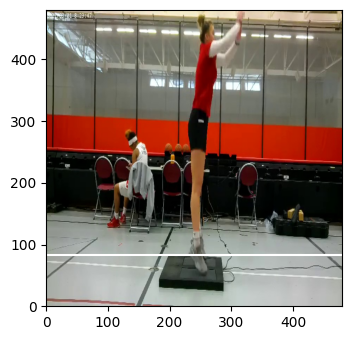

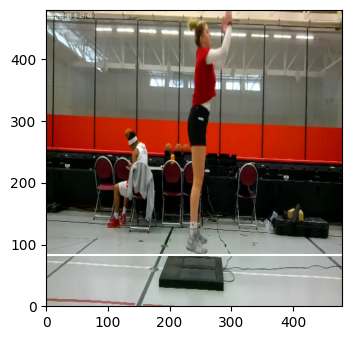

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

res1 = []
df2 = pd.read_csv('HorizontalLessScore.csv')
# Using orient as records
df2 = df2.to_dict('records')

#frames on jump
res1 = [d['image_name'] for d in df2 if((d['rightHeel'] > 100) and d['rightHeel'] < 400)]
print("================================================")
print("res::",(res1))

ans = len(res1)
a = ans - 1  #to fetch last frame

ff = (res1[0])

lf = (res1[a])

# lastframe = res.pop()
# print("lastframe:",(lastframe))


# framefetched = input(str("Enter frame name:"))


# Driver code   
df1 = pd.read_csv('HorizontalLessScore.csv')
print("df_col:",df1.columns)
name_list = df1['image_name'].tolist()
rightheel_list = (df1['rightHeel'].tolist())
A = [int(rightheel_list) for rightheel_list in rightheel_list]
B = [(name_list) for name_list in name_list]

framelist = []
imagelist = []
res = None
c = 0
for frame,img in zip(A,B):
    if frame >= 83:
        c = c + 1
        framelist.append(frame)
        imagelist.append(img)
print("count", c)

framelist.clear()
imagelist.clear()

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("SIDE_frames/"+ff)

fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 480,0 , 480])
plt.axhline(y = 83, color = 'white', linestyle = '-')
plt.show()

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("SIDE_frames/"+lf)

fig, ax = plt.subplots()
im = ax.imshow(im, extent=[0, 480,0 , 480])
plt.axhline(y = 83, color = 'white', linestyle = '-')
plt.show()

### For lateral frames

In [14]:
import cv2
import pandas as pd
output_loc = "SIDE_frames/"
cap = cv2.VideoCapture('videoLateral.mp4')
count = 0
frame_no = 0
framelist = []
timestamplist = []
while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
#         print("for frame : " + str(frame_no) + "   timestamp is: ", str(cap.get(cv2.CAP_PROP_POS_MSEC)))
        cv2.imwrite(output_loc + "/%#03d.jpg" % (count+1), curr_frame)
        count = count + 1
        framelist.append(str(frame_no)+".jpg")
        timestamplist.append(str(cap.get(cv2.CAP_PROP_POS_MSEC)))
    else:
        break
    frame_no += 1
cap.release()

print("=============================================================")
df_timestamp = pd.DataFrame({'Imagename':framelist,'TimeStamp':timestamplist})
# df_timestamp.iloc[39]
if(df_timestamp['Imagename'][52]):
    ans = float(df_timestamp['TimeStamp'].iloc[52])
    print(ans)
if(df_timestamp['Imagename'][53]):
    ans1 = float(df_timestamp['TimeStamp'].iloc[53])
    print(ans1)
timetaken = (ans1-ans) * 0.01
print("Timetaken in miliseconds:",timetaken)

1733.3333333333335
1766.6666666666665
Timetaken in miliseconds: 0.3333333333333303


In [15]:
symetricList = []
import pandas as pd
df1 = pd.read_csv('HorizontalLessScore.csv')
# print(df1.columns)

df = pd.DataFrame(
   dict(
      image_name = df1['image_name'],
      leftHeel = df1['leftHeel'],
      leftFoot = df1['leftFoot'],
      rightHeel = df1['rightHeel'],
      rightFoot = df1['rightFoot'],
      dis_rightHeelFootList = df1['dis_rightHeelFootList'],
      dis_leftHeelFootList = df1['dis_leftHeelFootList'],
      leftkneeAngle = df1['leftkneeAngle'],
      rightKneeAngle = df1['rightKneeAngle'],
      leftSHKAngle = df1['leftSHKAngle'],
      rightSHKAngle = df1['rightSHKAngle'],
      stance = df1['stance'],
      left_footZ = df1['left_footZ'],
      right_footZ = df1['right_footZ'],
      leftfootangle = df1['leftfootangle'],
      rightfootangle = df1['rightfootangle'],
      medialknee = df1['medialkneeposition'],
      rightHip = df1['rightHipAngle'],
      leftHip = df1['leftHipAngle'],
      l_ankleX = df1['leftAnkleX'],
      l_ankleY = df1['leftAnkleY'],
      l_kneeX = df1['leftkneeX'],
      l_kneeY = df1['leftkneeY']
   )
)

# print("Input DataFrame is:\n", df)
nth_row = 60
df_IC = df.iloc[nth_row]
print("Row ", nth_row, "of the DataFrame is: \n", df_IC)

if(df_IC['leftHeel'] + df_IC['rightHeel']) > (df_IC['leftFoot']+df_IC['rightFoot']):
    print("Flatfoot_heeltotoe",timetaken)
    ap = 0
    symetricList.append(ap)

elif(df_IC['leftHeel'] + df_IC['rightHeel']) < (df_IC['leftFoot']+df_IC['rightFoot']):
    print("Flatfoot_toetoheel",timetaken)
    ap = 1
    symetricList.append(ap)
    
print(symetricList)

Row  60 of the DataFrame is: 
 image_name                  062.jpg
leftHeel                 369.036083
leftFoot                 354.056654
rightHeel                380.218449
rightFoot                382.049303
dis_rightHeelFootList      1.830854
dis_leftHeelFootList     -14.979429
leftkneeAngle            172.034887
rightKneeAngle           168.605563
leftSHKAngle             171.850418
rightSHKAngle            169.932816
stance                    32.137585
left_footZ                 0.169811
right_footZ               -0.156723
leftfootangle             106.87973
rightfootangle             37.05448
medialknee                -2.490693
rightHip                 112.645659
leftHip                  111.720757
l_ankleX                 423.829285
l_ankleY                 355.641575
l_kneeX                  435.158257
l_kneeY                  272.932062
Name: 60, dtype: object
Flatfoot_heeltotoe 0.3333333333333303
[0]


For Finding kfmax

In [16]:

import pandas as pd
import numpy
 
# Creating dataframe
dataFrame = pd.read_csv('HorizontalLessScore.csv')
# display(dataFrame)
leftkneeFlexon = df1['leftkneeAngle'].min()
print('leftkneeFlexon;',leftkneeFlexon)
rightkneeFlexon = df1['rightKneeAngle'].min()
print("rightkneeFlexon:",rightkneeFlexon)

kneeflxon = min(leftkneeFlexon,rightkneeFlexon)
print("kneeflxon",kneeflxon)



df2=dataFrame[dataFrame['leftkneeAngle']== leftkneeFlexon]['image_name'].values[0]
print('Image for left Knee Flexon:',df2)

df3 = dataFrame[dataFrame['rightKneeAngle']== rightkneeFlexon]['image_name'].values[0]
print('Image for right Knee Flexon:',df3)

leftkneeFlexon; 53.35878562396318
rightkneeFlexon: 124.82451646703556
kneeflxon 53.35878562396318
Image for left Knee Flexon: 122.jpg
Image for right Knee Flexon: 042.jpg


In [17]:
df_kF = pd.DataFrame(
   dict(
      image_name = df1['image_name'],
      leftHeel = df1['leftHeel'],
      leftFoot = df1['leftFoot'],
      rightHeel = df1['rightHeel'],
      rightFoot = df1['rightFoot'],
      dis_rightHeelFootList = df1['dis_rightHeelFootList'],
      dis_leftHeelFootList = df1['dis_leftHeelFootList'],
      leftkneeAngle = df1['leftkneeAngle'],
      rightKneeAngle = df1['rightKneeAngle'],
      leftSHKAngle = df1['leftSHKAngle'],
      rightSHKAngle = df1['rightSHKAngle'],
      stance = df1['stance'],
      left_footZ = df1['left_footZ'],
      right_footZ = df1['right_footZ'],
      leftfootangle = df1['leftfootangle'],
      rightfootangle = df1['rightfootangle'],
      medialknee = df1['medialkneeposition'],
      rightHip = df1['rightHipAngle'],
      leftHip = df1['leftHipAngle'],
      l_ankleX = df1['leftAnkleX'],
      l_ankleY = df1['leftAnkleY'],
      l_kneeX = df1['leftkneeX'],
      l_kneeY = df1['leftkneeY']
   )
)

kfmax_bj = 40
df_kF = df_kF.iloc[kfmax_bj]
print("Row ", kfmax_bj, "of the DataFrame is: \n", df_kF)

Row  40 of the DataFrame is: 
 image_name                  042.jpg
leftHeel                 398.049774
leftFoot                 404.182034
rightHeel                408.853283
rightFoot                420.527515
dis_rightHeelFootList     11.674232
dis_leftHeelFootList       6.132259
leftkneeAngle            171.005942
rightKneeAngle           124.824516
leftSHKAngle             141.512026
rightSHKAngle            110.248928
stance                    13.574455
left_footZ                 0.337759
right_footZ               -0.095809
leftfootangle             32.829151
rightfootangle            27.787564
medialknee                12.709381
rightHip                 165.768268
leftHip                  133.652213
l_ankleX                 421.947479
l_ankleY                 386.575584
l_kneeX                  438.936627
l_kneeY                  323.242035
Name: 40, dtype: object


In [18]:
DisplacementList = []

#knee flexion displacement
Knee_flexonICKF = df_IC['leftkneeAngle'] - df_kF['leftkneeAngle']
if(Knee_flexonICKF < 45):
    kf = 0
    DisplacementList.append(kf)
elif(Knee_flexonICKF > 45):
    kf = 1
    DisplacementList.append(kf)
elif(Knee_flexonICKF > 90):
    kf = 2
    DisplacementList.append(kf)
    
#trunk flexion 
if(df_IC['leftSHKAngle'] > df_kF['leftSHKAngle']):
    trunkFlexonICKF = df_IC['leftSHKAngle'] - df_kF['leftSHKAngle']
    tf = 0
    DisplacementList.append(tf)
else:
    tf = 1
    DisplacementList.append(tf)
    
    
if((df_IC['rightSHKAngle'] or df_IC['leftSHKAngle']) > 160 and (df_kF['rightSHKAngle'] or df_kF['leftSHKAngle'] > 160)):
    jd = 0
    DisplacementList.append(jd)
elif((df_IC['rightSHKAngle'] or df_IC['leftSHKAngle'] in range(100,160)) or (df_kF['rightSHKAngle'] or df_kF['leftSHKAngle'] in range(100,160))):
    jd = 1
    DisplacementList.append(jd)
else:
    jd = 2
    DisplacementList.append(jd)

     
print(DisplacementList)

[0, 0, 0]


In [19]:
final_list = []
final_list.extend(Frontal_RT)
final_list.extend(symetricList)
final_list.extend(DisplacementList)
overall_score = max(final_list)
# print('overall_score:',overall_score)
final_list.append(overall_score)
print(final_list)
print(sum(final_list))

overall_score: 1
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1]
3
